In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
indeks = pd.read_csv('CSV87 dane.csv',sep=';', decimal=',',index_col='Data godzina')
indeks.head()

,RDN 1fix,CRO,Generacja wiatraków(PSE) w MWh,Krajowe Zapotrzebowanie na moc PSE,Generacja JWCD w MWh,Generacja nJWCD w MWh,Wymagana rezerwa mocy w MWh,Emisja CO2 EUR/Tona,Observation Poland National (C)
Data godzina,,,,,,,,,
01-01-17 1:00,107.52,72.2,2117.0,15750.0,7813.0,7937.0,1424.0,5.0,-1.75
01-01-17 2:00,104.40,72.2,2091.0,15000.0,7094.0,7906.0,1356.0,5.0,-1.75
01-01-17 3:00,83.66,72.2,2056.0,14250.0,6393.0,7857.0,1289.0,5.0,-1.75
01-01-17 4:00,75.15,72.2,2015.0,13725.0,5912.0,7813.0,1242.0,5.0,-1.85
01-01-17 5:00,74.99,72.1,1990.0,13425.0,5639.0,7786.0,1215.0,5.0,-1.95


In [4]:
feature_cols = ['Generacja wiatraków(PSE) w MWh','Krajowe Zapotrzebowanie na moc PSE','Generacja JWCD w MWh','Generacja nJWCD w MWh','Wymagana rezerwa mocy w MWh','Emisja CO2 EUR/Tona','Observation Poland National (C)']  ##Trzeba przygotować dane z nazwą kolumny ##
X = indeks[feature_cols]  ### wektor Xów zmiennych objasniających##
y = indeks['RDN 1fix'] ## tutaj zmienna zależna##

In [5]:
X = X.fillna(method='ffill') ## uzupełnia brakujace dane o poprzedni okres##
y = y.fillna(method='ffill')

In [6]:
X_train, X_test = X[-11544:-288], X[-288:] ## podział na zbór testowy i treningowy o tych samych wymiarach dla zbioru X i Y
y_train, y_test = y[-11544:-288], y[-288:] 

In [10]:
len(X_train)

11256

In [11]:
len(X_test)

288

In [5]:
#len(indeks)# ##tutaj korelacje liniowe zmiennych wsp korelacji pearsona##
indeks.corr()


,RDN 1fix,CRO,Generacja wiatraków(PSE) w MWh,Krajowe Zapotrzebowanie na moc PSE,Generacja JWCD w MWh,Generacja nJWCD w MWh,Wymagana rezerwa mocy w MWh,Emisja CO2 EUR/Tona,Observation Poland National (C)
RDN 1fix,1.000000,0.546075,-0.311221,0.600404,0.676883,-0.145844,0.598018,0.224241,0.011118
CRO,0.546075,1.000000,-0.201983,0.373397,0.433635,-0.113655,0.371265,0.097294,0.018045
Generacja wiatraków(PSE) w MWh,-0.311221,-0.201983,1.000000,0.023820,-0.386400,0.763070,0.025724,0.052898,-0.053802
Krajowe Zapotrzebowanie na moc PSE,0.600404,0.373397,0.023820,1.000000,0.854234,0.265718,0.999616,0.126604,-0.177669
Generacja JWCD w MWh,0.676883,0.433635,-0.386400,0.854234,1.000000,-0.272026,0.851395,0.005409,0.146559
Generacja nJWCD w MWh,-0.145844,-0.113655,0.763070,0.265718,-0.272026,1.000000,0.270327,0.225562,-0.603664
Wymagana rezerwa mocy w MWh,0.598018,0.371265,0.025724,0.999616,0.851395,0.270327,1.000000,0.123444,-0.182582
Emisja CO2 EUR/Tona,0.224241,0.097294,0.052898,0.126604,0.005409,0.225562,0.123444,1.000000,-0.217360
Observation Poland National (C),0.011118,0.018045,-0.053802,-0.177669,0.146559,-0.603664,-0.182582,-0.217360,1.000000


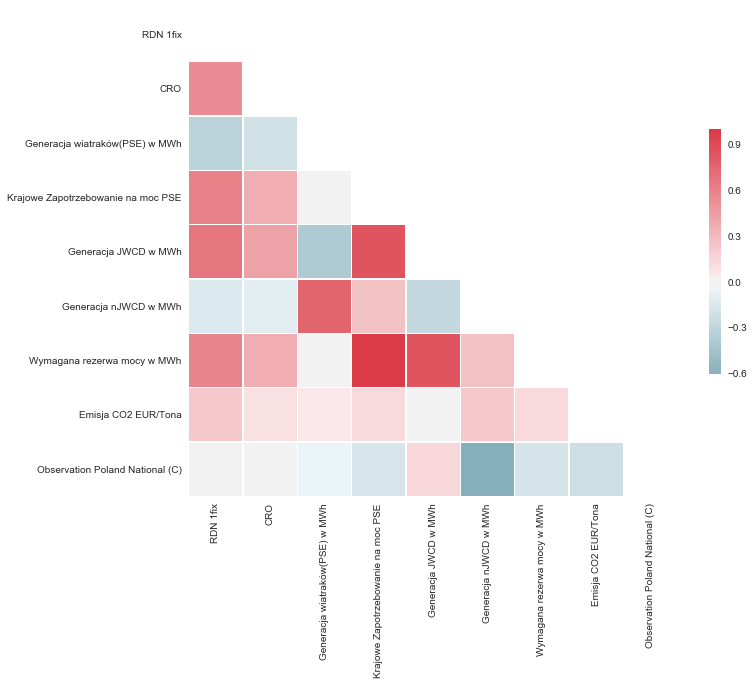

In [6]:
import seaborn as sns
sns.set(style="white")
corr = indeks.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [9]:
X_test

array([[-0.66796734, -1.41438295, -0.95201048, ..., -1.41454907,
         3.19544193,  0.25053927],
       [-0.67305374, -1.63822557, -1.17566112, ..., -1.6401966 ,
         3.19544193,  0.20425949],
       [-0.6950948 , -1.73856881, -1.27186492, ..., -1.73934475,
         3.19544193,  0.13483982],
       ...,
       [-0.23731887,  0.43810766,  0.75305495, ...,  0.42482012,
         2.8043187 ,  0.15797971],
       [-0.17967301, -0.11763953,  0.21326192, ..., -0.12904198,
         2.8043187 ,  0.10012998],
       [-0.11778849, -0.54216863, -0.22568725, ..., -0.55298581,
         2.8043187 ,  0.0538502 ]])

In [7]:
#from sklearn.model_selection import TimeSeriesSplit                ## podział na testowy i treningowy według indeksów czasowych z 1/3 czescia df jako test od konca i 2/3 od poczatku treningowego##
#X = np.array(X)
#y = np.array(y)
#tscv = TimeSeriesSplit(n_splits=3,)                          ## ten podział nie potrzebny bo juz byl zrobiony##
#print(tscv)  
#for train, test in tscv.split(X):
#    print("%s %s" % (train, test))
#    X_train, X_test = X[train], X[test]
 #   y_train, y_test = y[train], y[test]

In [8]:
#tscv.split(X_test)
#tscv.split(X_train) ## to też nie potrzebne##
#tscv.split(y_train)
#tscv.split(y_test)#

In [13]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  
X_test

array([[-0.66796734, -1.41438295, -0.95201048, ..., -1.41454907,
         3.19544193,  0.25053927],
       [-0.67305374, -1.63822557, -1.17566112, ..., -1.6401966 ,
         3.19544193,  0.20425949],
       [-0.6950948 , -1.73856881, -1.27186492, ..., -1.73934475,
         3.19544193,  0.13483982],
       ...,
       [-0.23731887,  0.43810766,  0.75305495, ...,  0.42482012,
         2.8043187 ,  0.15797971],
       [-0.17967301, -0.11763953,  0.21326192, ..., -0.12904198,
         2.8043187 ,  0.10012998],
       [-0.11778849, -0.54216863, -0.22568725, ..., -0.55298581,
         2.8043187 ,  0.0538502 ]])

In [29]:
from sklearn.neural_network import MLPRegressor
perceptron = MLPRegressor(hidden_layer_sizes=(666),learning_rate_init=0.05,solver='adam',learning_rate='adaptive',activation='tanh',max_iter=10000)
perceptron.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=666, learning_rate='adaptive',
       learning_rate_init=0.05, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [30]:
y_pred=perceptron.predict(X_test) ## dla testowego##
print(y_pred)

[164.37667686 162.45566995 162.93221414 164.12044795 163.92952293
 161.66179533 158.39680984 159.93810011 163.84643515 163.00686266
 161.21304676 158.95160793 156.81503029 155.00269339 152.76916859
 150.69680451 150.76565987 153.10188503 157.40028928 166.8376797
 176.5939732  171.05026316 163.54377315 159.55014193 152.79698348
 154.33408047 156.40343697 158.07551907 159.04490468 161.93143388
 176.7122099  205.84412232 231.381483   249.40460137 252.92585969
 266.04597458 268.59901953 260.11901135 239.14572886 225.31761172
 212.52555952 206.54817098 204.68982783 219.84399956 266.26524774
 214.7227618  187.25312528 174.46911001 166.96686356 164.40947971
 163.36784406 163.24884734 163.45825932 166.05239972 181.71209056
 209.12570376 228.85203009 237.97821362 235.93732501 241.69716383
 243.45153035 232.99777199 217.75012152 211.61279895 206.06524435
 204.87390749 207.22123018 218.21152134 253.84268932 220.36564574
 196.96839604 183.10075106 173.8810821  170.15124805 169.39068304
 170.738613

In [31]:
print(perceptron.coefs_)
print(perceptron.intercepts_)
print(perceptron.loss_) ## strata obliczona z funkcji straty##
print(perceptron.n_iter_)## ilosc iteracji uczenia##
print(perceptron.n_layers_)
print(perceptron.n_outputs_)
print(perceptron.out_activation_)

[array([[-3.64870053e-01, -2.94497468e+00,  9.75288856e-02, ...,
         7.81007488e-03, -2.69555158e-03, -5.73466899e-03],
       [ 3.15315866e-01, -1.58252279e+00,  1.59075489e-02, ...,
        -1.06356903e-01, -8.62321539e-02, -9.77133155e-02],
       [-1.14751103e-01, -9.96501875e-01,  5.32709041e-02, ...,
         8.72529637e-03, -4.31382306e-02, -3.46565437e-02],
       ...,
       [ 1.01983044e+00, -1.92083178e+00,  7.89204737e-02, ...,
        -3.55084238e-02,  2.30806166e-03,  5.80046712e-03],
       [ 1.19366810e+00,  5.26359277e+00, -2.70423254e-02, ...,
         6.61344530e-02,  2.39074069e-02,  2.14663661e-02],
       [ 6.30456159e+00, -3.73265834e+00, -2.01022617e-01, ...,
         1.84237040e-01,  1.47112897e-01,  1.50129445e-01]]), array([[ 2.46828715e+00],
       [-2.80632854e+00],
       [ 7.94705244e-01],
       [-7.18482144e-01],
       [-3.54658562e+00],
       [ 7.97309320e-01],
       [-2.33640463e-01],
       [-7.93531716e-01],
       [-1.92726806e-01],
       

In [38]:
wyniki = pd.DataFrame()
wyniki['Actual']= y_test[:264]
wyniki['predicted']= y_pred[:264]
wyniki.columns=['Actual','predicted']
#wyniki=wyniki.sort_values(by=['Actual'])#
wyniki['index']=range(len(wyniki))

In [39]:
wyniki[-264:]

,Actual,predicted,index
Data godzina,,,
15-04-18 1:00,159.49,164.376677,0
15-04-18 2:00,157.54,162.455670,1
15-04-18 3:00,155.00,162.932214,2
15-04-18 4:00,154.39,164.120448,3
15-04-18 5:00,150.00,163.929523,4
15-04-18 6:00,150.00,161.661795,5
15-04-18 7:00,142.70,158.396810,6
15-04-18 8:00,146.19,159.938100,7
15-04-18 9:00,160.58,163.846435,8


In [34]:
#len(X_test)#


<IPython.core.display.Javascript object>


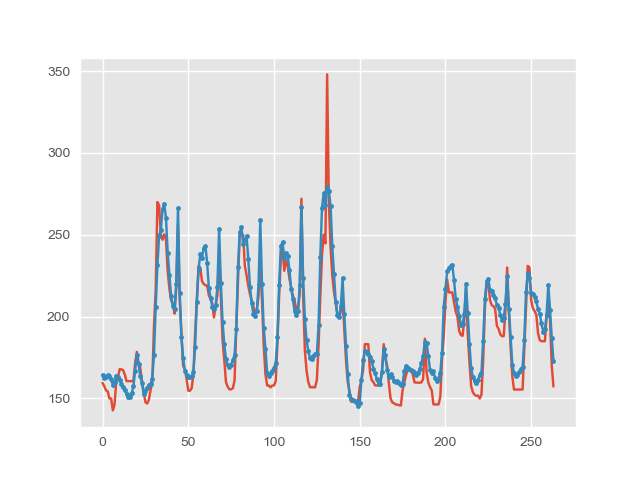

In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.plot(wyniki['index'],wyniki['Actual'])## Czerwone kropki to obserwacje za ostatnie 11 dni, niebieskie to prognoza
plt.plot(wyniki['index'],wyniki['predicted'],marker='.',) 

In [41]:
from sklearn.metrics import r2_score   #tutaj błędy modelu na zbiorze testowym ##
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from math import sqrt
r=r2_score(wyniki['Actual'],wyniki['predicted'])
msle=mean_squared_log_error(wyniki['Actual'],wyniki['predicted'])
mse=mean_squared_error(wyniki['Actual'],wyniki['predicted'])
mae=mean_absolute_error(wyniki['Actual'],wyniki['predicted'])
evs=explained_variance_score(wyniki['Actual'],wyniki['predicted'])
medianae=median_absolute_error(wyniki['Actual'],wyniki['predicted'])
mape=np.mean(np.abs((wyniki['Actual'] -wyniki['predicted']) / wyniki['Actual'])) * 100
rmse=sqrt(mean_squared_error(wyniki['Actual'],wyniki['predicted']))
bledy1= np.array([['r2_score','mean squared log error','mean squared error','mean absolute error','explained variance score','median absolute error','MAPE','RMSE'],[r,msle,mse,mae,evs,medianae,mape,rmse]],dtype='U25')
df = pd.DataFrame(data=bledy1,columns=bledy1[0])
Bledy2=df.drop(0)
Bledy2.head()

,r2_score,mean squared log error,mean squared error,mean absolute error,explained variance score,median absolute error,MAPE,RMSE
1,0.8756447318082579,0.003388895435921549,133.7294102039761,9.01772725368141,0.9132970263216124,8.00108271681188,4.897723068043995,11.564143297450793


In [67]:
from sklearn.metrics import mean_squared_error

In [50]:
blad = mean_squared_error(wyniki['Actual'],wyniki['predicted'])
print(blad)

198.23332411770033


In [51]:
from math import sqrt ###RMSE## ##RMSE## na 264 ostatnich obserwacji  czyli 11 dni do tyłu #Średni błąd kwadratowy#
sqrt(blad)
sqrt(blad) ##średnio na 11 dni się mylił o wartość poniżej:#

14.079535649931795

In [33]:
prediction= perceptron.predict(X_test[-24:])  ## -24 ostatnie obserwacje w testowym to dzień t+1##
print(prediction)

[160.64933844 165.22042403 169.30256057 169.70504779 168.22912622
 167.35501386 192.54724657 232.11988729 245.83265861 251.49884983
 252.19217615 255.35275583 256.23540632 252.81386059 247.49603797
 242.92118506 234.90162387 227.68171299 232.81063183 243.41885973
 263.15226326 239.69766622 208.80476255 186.0872107 ]


In [34]:
perceptron.predict(X_test[-24:])

array([160.64933844, 165.22042403, 169.30256057, 169.70504779,
       168.22912622, 167.35501386, 192.54724657, 232.11988729,
       245.83265861, 251.49884983, 252.19217615, 255.35275583,
       256.23540632, 252.81386059, 247.49603797, 242.92118506,
       234.90162387, 227.68171299, 232.81063183, 243.41885973,
       263.15226326, 239.69766622, 208.80476255, 186.0872107 ])

In [35]:
dates2 = pd.date_range(start='2018-04-26 01:00',end='2018-04-27 00:00',freq='1h') 
for i in range(0,24):
    print(dates2[i])

2018-04-26 01:00:00
2018-04-26 02:00:00
2018-04-26 03:00:00
2018-04-26 04:00:00
2018-04-26 05:00:00
2018-04-26 06:00:00
2018-04-26 07:00:00
2018-04-26 08:00:00
2018-04-26 09:00:00
2018-04-26 10:00:00
2018-04-26 11:00:00
2018-04-26 12:00:00
2018-04-26 13:00:00
2018-04-26 14:00:00
2018-04-26 15:00:00
2018-04-26 16:00:00
2018-04-26 17:00:00
2018-04-26 18:00:00
2018-04-26 19:00:00
2018-04-26 20:00:00
2018-04-26 21:00:00
2018-04-26 22:00:00
2018-04-26 23:00:00
2018-04-27 00:00:00


In [36]:
prognoza24h=pd.DataFrame(data=prediction,    # values             ## tutaj prognoza na 13##
...              index=dates2,    # 1st column as index
...              columns=['prognoza'])  # 1st row as the column names
print(prognoza24h)   ##tutaj prognoza na 04.01.2018

                       prognoza
2018-04-26 01:00:00  160.649338
2018-04-26 02:00:00  165.220424
2018-04-26 03:00:00  169.302561
2018-04-26 04:00:00  169.705048
2018-04-26 05:00:00  168.229126
2018-04-26 06:00:00  167.355014
2018-04-26 07:00:00  192.547247
2018-04-26 08:00:00  232.119887
2018-04-26 09:00:00  245.832659
2018-04-26 10:00:00  251.498850
2018-04-26 11:00:00  252.192176
2018-04-26 12:00:00  255.352756
2018-04-26 13:00:00  256.235406
2018-04-26 14:00:00  252.813861
2018-04-26 15:00:00  247.496038
2018-04-26 16:00:00  242.921185
2018-04-26 17:00:00  234.901624
2018-04-26 18:00:00  227.681713
2018-04-26 19:00:00  232.810632
2018-04-26 20:00:00  243.418860
2018-04-26 21:00:00  263.152263
2018-04-26 22:00:00  239.697666
2018-04-26 23:00:00  208.804763
2018-04-27 00:00:00  186.087211


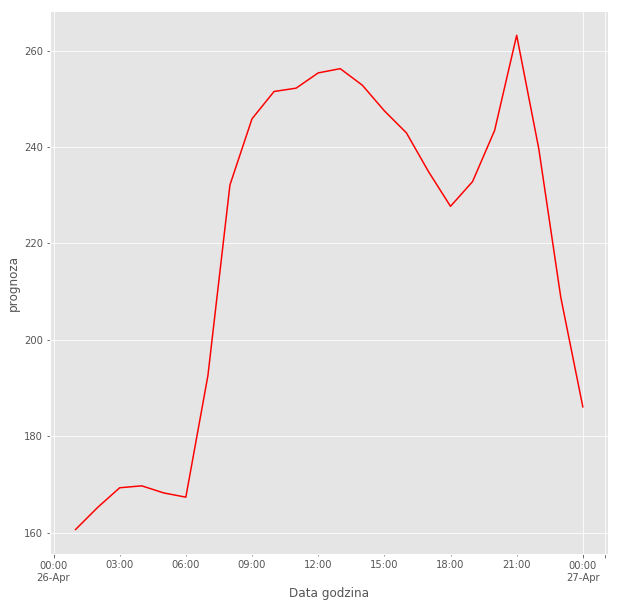

In [37]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


prognoza24h['prognoza'].plot(figsize=(10,10),color='red')
plt.xlabel('Data godzina')
plt.ylabel('prognoza')
plt.show()

In [38]:
prognoza24h.mean() ## base# średnia z prognozy#

prognoza    219.417763
dtype: float64

In [39]:
prognoza24h.std() # odchylenie standardowe cen na rynku wg. prognozy#

prognoza    36.177831
dtype: float64

In [23]:
peak=prognoza24h.sort_index().loc[prognoza24h.index[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]]  ## tutaj peak ##
peak.mean()
print(peak)
print(peak.mean())

                       prognoza
2018-04-26 08:00:00  190.810741
2018-04-26 09:00:00  208.276288
2018-04-26 10:00:00  209.954802
2018-04-26 11:00:00  203.021330
2018-04-26 12:00:00  206.607400
2018-04-26 13:00:00  206.679863
2018-04-26 14:00:00  202.799890
2018-04-26 15:00:00  197.914973
2018-04-26 16:00:00  195.210186
2018-04-26 17:00:00  190.335327
2018-04-26 18:00:00  189.193902
2018-04-26 19:00:00  192.325181
2018-04-26 20:00:00  209.312908
2018-04-26 21:00:00  231.083963
2018-04-26 22:00:00  202.009584
prognoza    202.369089
dtype: float64


In [27]:
#prognoza24h.to_csv('prognoza20', encoding='utf-8', sep='\t')#

In [28]:
wyniki = pd.DataFrame()
wyniki['Actual']= y_test
wyniki['predicted']= y_pred
wyniki.columns=['Actual','predicted']
wyniki=wyniki.sort_values(by=['Actual'])
wyniki['index']=range(len(wyniki))

<IPython.core.display.Javascript object>


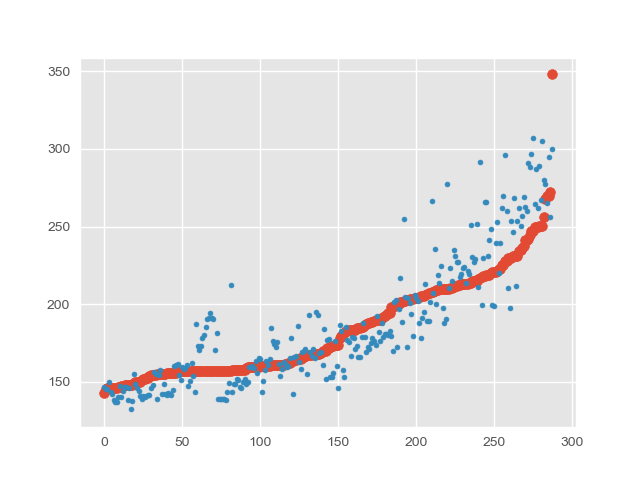

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.scatter(wyniki['index'],wyniki['Actual'])## Czerwone kropki to obserwacje za ostatnie 11 dni, niebieskie to prognoza
plt.scatter(wyniki['index'],wyniki['predicted'],marker='.',)  # tylko tutaj uszeregowane według wartości nie poszegregowane czasowo

In [ ]:
##tutaj można posprawdzać strukture i sie estymuje i pokazuje jak sobie radzi na trenigowych i walidacyjnych danych na krzywej poniżej
## można pozmieniać architekture i obczaić efekty##

In [31]:
perceptron.set_params(alpha=0.10) ## tutaj modele do prognozy interwałowej na innych poziomach tolerancji 90%, 50% etc. alpha to wsp. istotności im mniejszy tym dokładniejszy model. 
perceptron.fit(X_train,y_train)
y_upper=perceptron.predict(X_test[-24:])

In [32]:
perceptron.set_params(alpha=0.50) ## tutaj prognoza 50%
perceptron.fit(X_train,y_train)
y_lower=perceptron.predict(X_test[-24:])

In [33]:
prognoza24h=pd.DataFrame(data=prediction,    # values             ## 99,999%
...              index=dates2,    # 1st column as index
...              columns=['prognoza'])  # 1st row as the column names
print(prognoza24h)  
print(prognoza24h.mean()) # pod szeregiem czasowym średnia czyli BASE prognozy##

                       prognoza
2018-02-15 01:00:00  126.958990
2018-02-15 02:00:00  119.176106
2018-02-15 03:00:00  116.362411
2018-02-15 04:00:00  116.545583
2018-02-15 05:00:00  120.433470
2018-02-15 06:00:00  132.603670
2018-02-15 07:00:00  173.318180
2018-02-15 08:00:00  217.300111
2018-02-15 09:00:00  229.411356
2018-02-15 10:00:00  236.915305
2018-02-15 11:00:00  237.110630
2018-02-15 12:00:00  236.628027
2018-02-15 13:00:00  235.228132
2018-02-15 14:00:00  233.594375
2018-02-15 15:00:00  225.969252
2018-02-15 16:00:00  218.615837
2018-02-15 17:00:00  207.835343
2018-02-15 18:00:00  207.354247
2018-02-15 19:00:00  200.517157
2018-02-15 20:00:00  190.661939
2018-02-15 21:00:00  174.814714
2018-02-15 22:00:00  155.142886
2018-02-15 23:00:00  133.464427
2018-02-16 00:00:00  117.608676
prognoza    181.815451
dtype: float64


In [34]:
y_mniejsza=pd.DataFrame(data=y_lower,   ##50%
                       index=dates2,
                       columns=['prognoza m'])
print(y_mniejsza)
print(y_mniejsza.mean()) # pod szeregiem czasowym średnia czyli BASE prognozy##

                     prognoza m
2018-02-15 01:00:00  160.879432
2018-02-15 02:00:00  153.946464
2018-02-15 03:00:00  150.835558
2018-02-15 04:00:00  150.910801
2018-02-15 05:00:00  154.988812
2018-02-15 06:00:00  164.948822
2018-02-15 07:00:00  199.214069
2018-02-15 08:00:00  230.546610
2018-02-15 09:00:00  245.775680
2018-02-15 10:00:00  255.504944
2018-02-15 11:00:00  255.985241
2018-02-15 12:00:00  255.973822
2018-02-15 13:00:00  254.632558
2018-02-15 14:00:00  252.389778
2018-02-15 15:00:00  242.066665
2018-02-15 16:00:00  231.251942
2018-02-15 17:00:00  219.279673
2018-02-15 18:00:00  220.511388
2018-02-15 19:00:00  210.617355
2018-02-15 20:00:00  197.968926
2018-02-15 21:00:00  179.838378
2018-02-15 22:00:00  165.199176
2018-02-15 23:00:00  148.962560
2018-02-16 00:00:00  134.518396
prognoza m    201.531127
dtype: float64


In [35]:
y_wieksza=pd.DataFrame(data=y_upper,  ##90%
                       index=dates2,
                       columns=['prognoza w'])
print(y_wieksza)
print(y_wieksza.mean()) # pod szeregiem czasowym średnia czyli BASE prognozy##

                     prognoza w
2018-02-15 01:00:00  162.911332
2018-02-15 02:00:00  155.930841
2018-02-15 03:00:00  151.886664
2018-02-15 04:00:00  152.057154
2018-02-15 05:00:00  157.209819
2018-02-15 06:00:00  167.203019
2018-02-15 07:00:00  203.522155
2018-02-15 08:00:00  231.716751
2018-02-15 09:00:00  248.010001
2018-02-15 10:00:00  258.296524
2018-02-15 11:00:00  258.958736
2018-02-15 12:00:00  259.348543
2018-02-15 13:00:00  258.112692
2018-02-15 14:00:00  255.652014
2018-02-15 15:00:00  243.623430
2018-02-15 16:00:00  233.036431
2018-02-15 17:00:00  223.580086
2018-02-15 18:00:00  229.185967
2018-02-15 19:00:00  221.341484
2018-02-15 20:00:00  210.891862
2018-02-15 21:00:00  192.850647
2018-02-15 22:00:00  172.507096
2018-02-15 23:00:00  152.937393
2018-02-16 00:00:00  139.466478
prognoza w    205.843213
dtype: float64


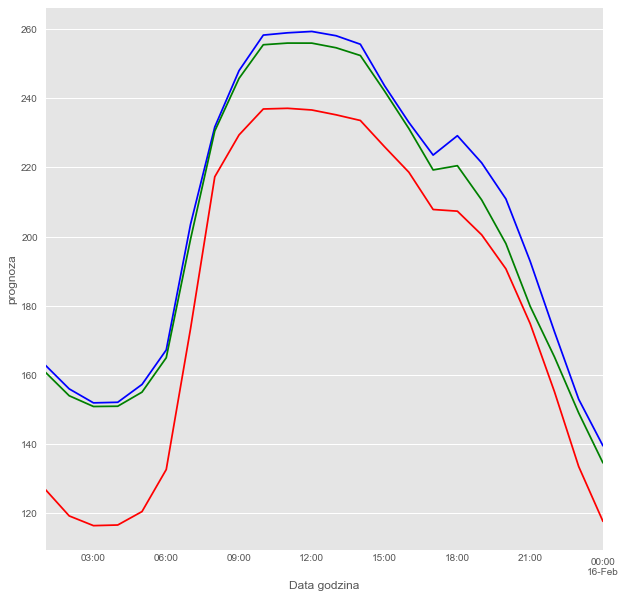

In [36]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


prognoza24h['prognoza'].plot(figsize=(10,10),color='red') ## czerwony to jest istotność 0,9999 99,99%
y_wieksza['prognoza w'].plot(figsize=(10,10),color='blue') ## niebieski 0,9 90%
y_mniejsza['prognoza m'].plot(figsize=(10,10),color='green') ## zielony 0,5 czyli 50% 
plt.xlabel('Data godzina')
plt.ylabel('prognoza')
plt.show()

In [37]:
peak99=prognoza24h.sort_index().loc[prognoza24h.index[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]]  ## tutaj peak ##
peak.mean()
print(peak)
print(peak.mean()) ## peak 99##

                       prognoza
2018-02-15 08:00:00  217.300111
2018-02-15 09:00:00  229.411356
2018-02-15 10:00:00  236.915305
2018-02-15 11:00:00  237.110630
2018-02-15 12:00:00  236.628027
2018-02-15 13:00:00  235.228132
2018-02-15 14:00:00  233.594375
2018-02-15 15:00:00  225.969252
2018-02-15 16:00:00  218.615837
2018-02-15 17:00:00  207.835343
2018-02-15 18:00:00  207.354247
2018-02-15 19:00:00  200.517157
2018-02-15 20:00:00  190.661939
2018-02-15 21:00:00  174.814714
2018-02-15 22:00:00  155.142886
prognoza    213.806621
dtype: float64


In [38]:
peak50=y_mniejsza.sort_index().loc[y_mniejsza.index[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]]  ## tutaj peak ##
peak50.mean()
print(peak50)
print(peak50.mean()) ## peak 50%##


                     prognoza m
2018-02-15 08:00:00  230.546610
2018-02-15 09:00:00  245.775680
2018-02-15 10:00:00  255.504944
2018-02-15 11:00:00  255.985241
2018-02-15 12:00:00  255.973822
2018-02-15 13:00:00  254.632558
2018-02-15 14:00:00  252.389778
2018-02-15 15:00:00  242.066665
2018-02-15 16:00:00  231.251942
2018-02-15 17:00:00  219.279673
2018-02-15 18:00:00  220.511388
2018-02-15 19:00:00  210.617355
2018-02-15 20:00:00  197.968926
2018-02-15 21:00:00  179.838378
2018-02-15 22:00:00  165.199176
prognoza m    227.836142
dtype: float64


In [39]:
peak90=y_wieksza.sort_index().loc[y_wieksza.index[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]]  ## tutaj peak ##
peak90.mean()
print(peak90)
print(peak90.mean()) ## peak 90##

                     prognoza w
2018-02-15 08:00:00  231.716751
2018-02-15 09:00:00  248.010001
2018-02-15 10:00:00  258.296524
2018-02-15 11:00:00  258.958736
2018-02-15 12:00:00  259.348543
2018-02-15 13:00:00  258.112692
2018-02-15 14:00:00  255.652014
2018-02-15 15:00:00  243.623430
2018-02-15 16:00:00  233.036431
2018-02-15 17:00:00  223.580086
2018-02-15 18:00:00  229.185967
2018-02-15 19:00:00  221.341484
2018-02-15 20:00:00  210.891862
2018-02-15 21:00:00  192.850647
2018-02-15 22:00:00  172.507096
prognoza w    233.140818
dtype: float64


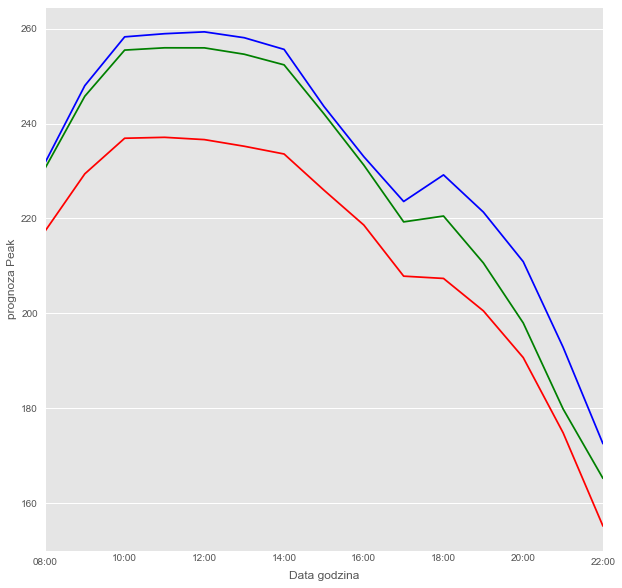

In [41]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


peak99['prognoza'].plot(figsize=(10,10),color='red') ## czerwony to jest istotność 0,9999 99,99%
peak90['prognoza w'].plot(figsize=(10,10),color='blue') ## niebieski 0,9 90%
peak50['prognoza m'].plot(figsize=(10,10),color='green') ## zielony 0,5 czyli 50% 
plt.xlabel('Data godzina')
plt.ylabel('prognoza Peak')
plt.show()